In [4]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [6]:
EXCLUDED_CHARACTERS = " <>=@^]`[\_{}|*"
ALLOWED_CHARACTERS = "".join(chr(x) for x in range(32, 123) if chr(x) not in EXCLUDED_CHARACTERS)

print(ALLOWED_CHARACTERS)

nltk.download("all")


def preprocess_text(text: str) -> str:
    text = "".join([char for char in text if char in ALLOWED_CHARACTERS])
    tokens = word_tokenize(text.lower())
    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    processed_text = ' '.join(lemmatized_tokens)

    return processed_text


def get_sentiment(preprocessed_text: str, analyzer: SentimentIntensityAnalyzer) -> dict:
    scores = analyzer.polarity_scores(preprocessed_text)

    return scores

<>:1: SyntaxWarning: invalid escape sequence '\_'
<>:1: SyntaxWarning: invalid escape sequence '\_'
/tmp/ipykernel_109259/3261512589.py:1: SyntaxWarning: invalid escape sequence '\_'
  EXCLUDED_CHARACTERS = " <>=@^]`[\_{}|*"
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /home/malinkyzubr/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /home/malinkyzubr/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /home/malinkyzubr/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /home/malinkyzubr/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is alread

!"#$%&'()+,-./0123456789:;?ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz


[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package comparative_sentences to
[nltk_data]    |     /home/malinkyzubr/nltk_data...
[nltk_data]    |   Package comparative_sentences is already up-to-
[nltk_data]    |       date!
[nltk_data]    | Downloading package comtrans to
[nltk_data]    |     /home/malinkyzubr/nltk_data...
[nltk_data]    |   Package comtrans is already up-to-date!
[nltk_data]    | Downloading package conll2000 to
[nltk_data]    |     /home/malinkyzubr/nltk_data...
[nltk_data]    |   Package conll2000 is already up-to-date!
[nltk_data]    | Downloading package conll2002 to
[nltk_data]    |     /home/malinkyzubr/nltk_data...
[nltk_data]    |   Package conll2002 is already up-to-date!
[nltk_data]    | Downloading package conll2007 to
[nltk_data]    |     /home/malinkyzubr/nltk_data...
[nltk_data]    |   Package conll2007 is already up-to-date!
[nltk_data]    | Downloading package crubadan to
[nltk_data]    |     /home/malinkyzub

In [2]:
import os

In [16]:
scores = dict()
analyzer = SentimentIntensityAnalyzer()
for file in os.listdir("/home/malinkyzubr/Desktop/HIST302/302hist/files"):
    if not file.endswith(".txt"):
        continue
    date = file.split(".")[0]

    with open(f"/home/malinkyzubr/Desktop/HIST302/302hist/files/{file}", "r") as f:
        text = f.read()
        text = preprocess_text(text)
        score = get_sentiment(text, analyzer)
        scores[date] = score
        print(f"{file} DONE: {score}")

Sunday, 2 February 1941.txt DONE: {'neg': 0.0, 'neu': 0.993, 'pos': 0.007, 'compound': 0.7293}
Tuesday, 28 October 1941.txt DONE: {'neg': 0.003, 'neu': 0.99, 'pos': 0.007, 'compound': 0.6159}
Tuesday, 16 February 1943.txt DONE: {'neg': 0.009, 'neu': 0.988, 'pos': 0.003, 'compound': -0.6935}
Wednesday, 5 February 1936.txt DONE: {'neg': 0.003, 'neu': 0.967, 'pos': 0.03, 'compound': 0.9793}
Thursday, 26 March 1942.txt DONE: {'neg': 0.006, 'neu': 0.985, 'pos': 0.009, 'compound': 0.4268}
Thursday, 10 February 1944.txt DONE: {'neg': 0.005, 'neu': 0.986, 'pos': 0.009, 'compound': 0.6402}
Tuesday, 18 February 1936.txt DONE: {'neg': 0.007, 'neu': 0.98, 'pos': 0.013, 'compound': 0.7752}
Friday, 13 March 1936.txt DONE: {'neg': 0.009, 'neu': 0.977, 'pos': 0.014, 'compound': -0.5152}
Sunday, 21 April 1940.txt DONE: {'neg': 0.0, 'neu': 0.985, 'pos': 0.015, 'compound': 0.8634}
Wednesday, 14 January 1942.txt DONE: {'neg': 0.003, 'neu': 0.973, 'pos': 0.024, 'compound': 0.9503}
Sunday, 26 February 1939.

In [11]:
print(scores)

{'Sunday, 2 February 1941': {'neg': 0.0, 'neu': 0.993, 'pos': 0.007, 'compound': 0.7293}, 'Tuesday, 28 October 1941': {'neg': 0.003, 'neu': 0.99, 'pos': 0.007, 'compound': 0.6159}, 'Tuesday, 16 February 1943': {'neg': 0.009, 'neu': 0.988, 'pos': 0.003, 'compound': -0.6935}, 'Wednesday, 5 February 1936': {'neg': 0.003, 'neu': 0.967, 'pos': 0.03, 'compound': 0.9793}, 'Thursday, 26 March 1942': {'neg': 0.006, 'neu': 0.985, 'pos': 0.009, 'compound': 0.4268}, 'Thursday, 10 February 1944': {'neg': 0.005, 'neu': 0.986, 'pos': 0.009, 'compound': 0.6402}, 'Tuesday, 18 February 1936': {'neg': 0.007, 'neu': 0.98, 'pos': 0.013, 'compound': 0.7752}, 'Friday, 13 March 1936': {'neg': 0.009, 'neu': 0.977, 'pos': 0.014, 'compound': -0.5152}, 'Sunday, 21 April 1940': {'neg': 0.0, 'neu': 0.985, 'pos': 0.015, 'compound': 0.8634}, 'Wednesday, 14 January 1942': {'neg': 0.003, 'neu': 0.973, 'pos': 0.024, 'compound': 0.9503}, 'Sunday, 26 February 1939': {'neg': 0.003, 'neu': 0.979, 'pos': 0.018, 'compound': 0

In [17]:
import json

with open("/home/malinkyzubr/Desktop/HIST302/302hist/files/scores.json", "w") as f:
    json.dump(scores, f)

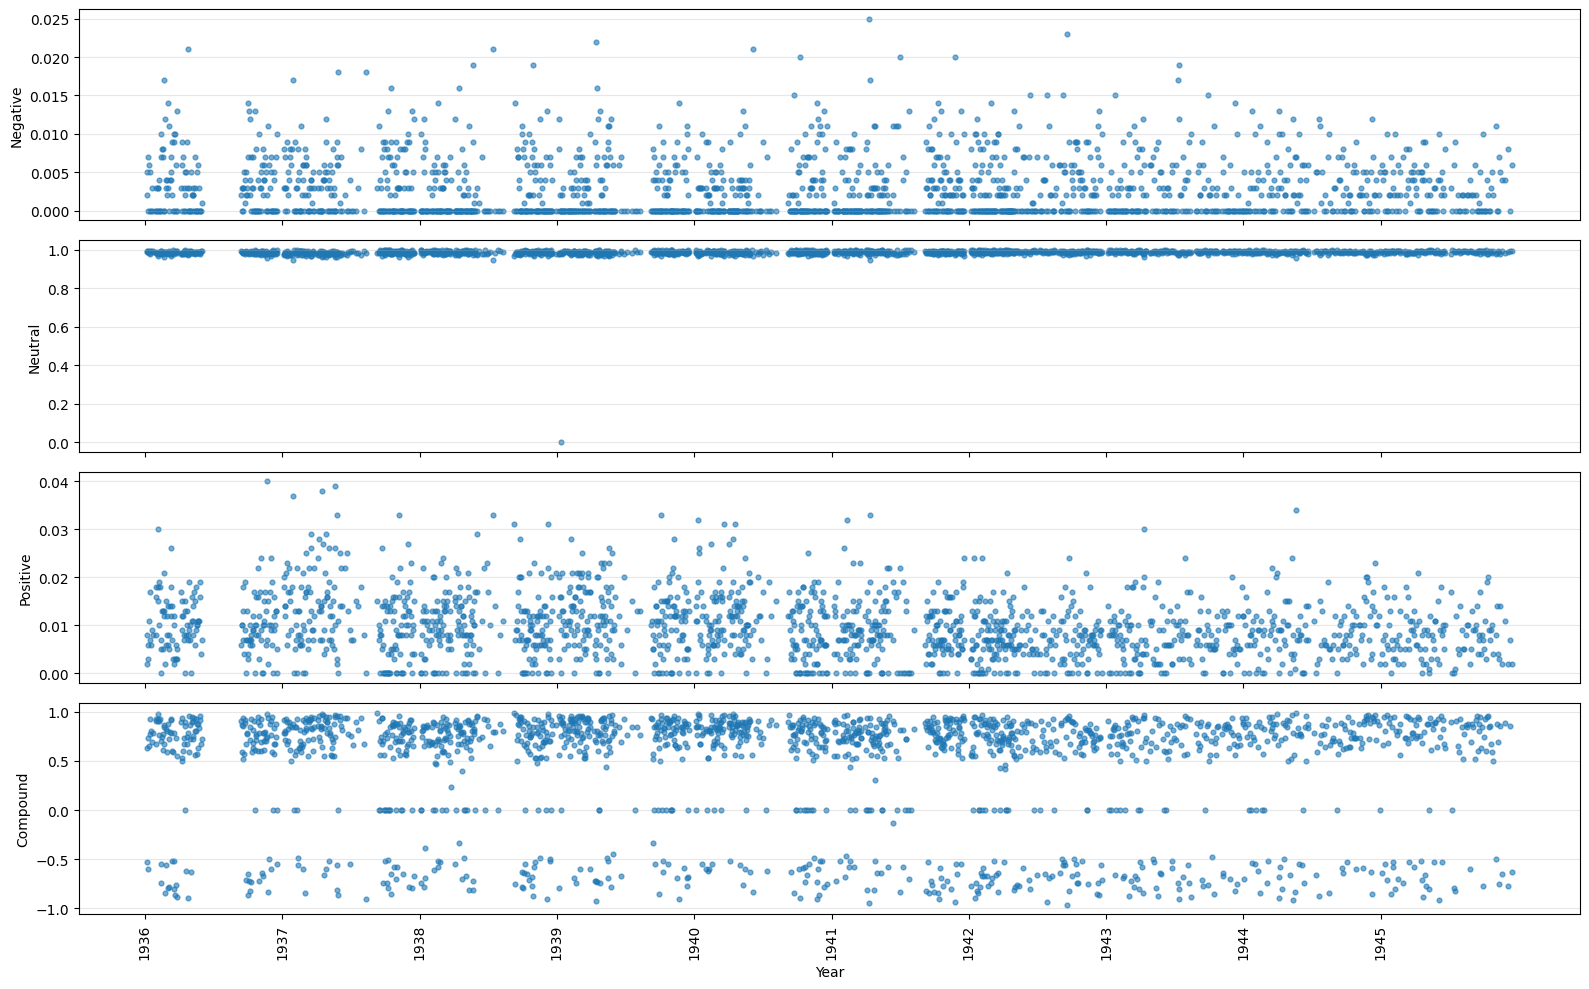

In [30]:
import matplotlib.pyplot as plt
from datetime import datetime


data = scores

dates = [datetime.strptime(d, "%A, %d %B %Y") for d in data.keys()]
neg = [data[d]['neg'] for d in data]
neu = [data[d]['neu'] for d in data]
pos = [data[d]['pos'] for d in data]
compound = [data[d]['compound'] for d in data]

# --- Determine year ticks ---
years = sorted({d.year for d in dates})        # unique years
year_ticks = [datetime(y, 1, 1) for y in years]

# --- Create 4 subplots ---
fig, axes = plt.subplots(4, 1, figsize=(16, 10), sharex=True)

categories = [
    ("Negative", neg),
    ("Neutral", neu),
    ("Positive", pos),
    ("Compound", compound)
]

for ax, (label, values) in zip(axes, categories):
    ax.scatter(dates, values, s=12, alpha=0.6)
    ax.set_ylabel(label)
    ax.grid(axis='y', alpha=0.3)

# --- Set ticks to only one per year ---
axes[-1].set_xticks(year_ticks)
axes[-1].set_xticklabels(years, rotation=90)

axes[-1].set_xlabel("Year")

plt.tight_layout()
plt.show()


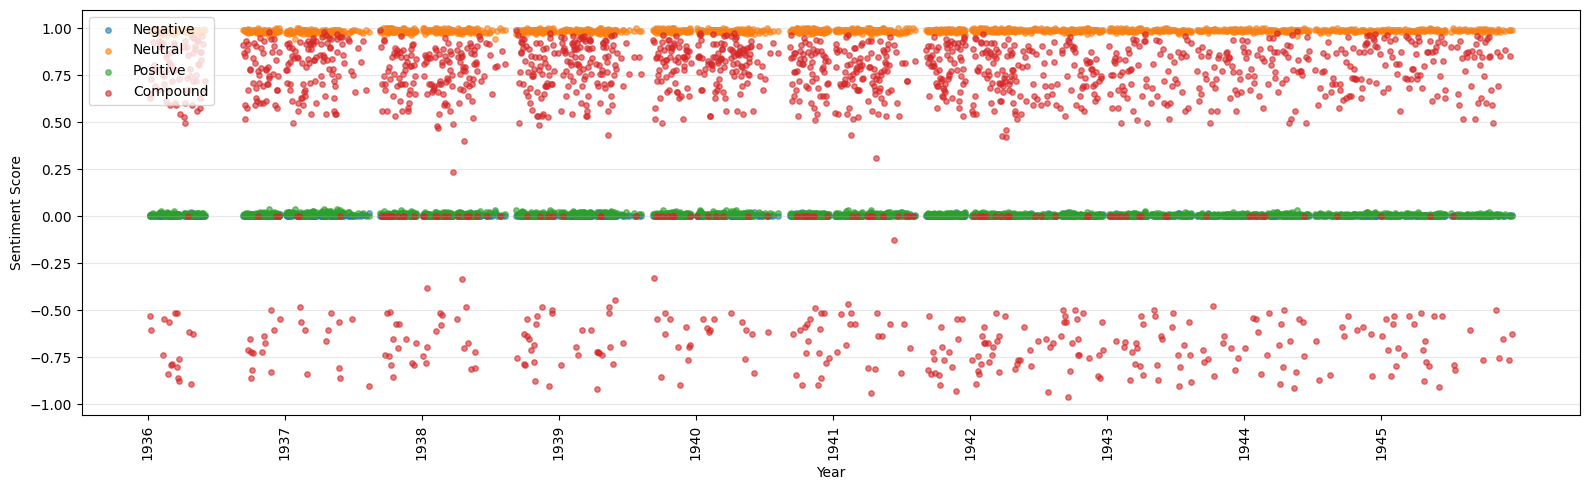

In [31]:
import matplotlib.pyplot as plt
from datetime import datetime

# --- Convert dates and extract values ---
dates = [datetime.strptime(d, "%A, %d %B %Y") for d in data.keys()]
neg = [data[d]['neg'] for d in data]
neu = [data[d]['neu'] for d in data]
pos = [data[d]['pos'] for d in data]
compound = [data[d]['compound'] for d in data]

# --- Unique years for x-axis ticks ---
years = sorted({d.year for d in dates})
year_ticks = [datetime(y, 1, 1) for y in years]

# --- Overlay scatter plot ---
plt.figure(figsize=(16,5))

plt.scatter(dates, neg, s=15, alpha=0.6, color="#1f77b4", label="Negative")
plt.scatter(dates, neu, s=15, alpha=0.6, color="#ff7f0e", label="Neutral")
plt.scatter(dates, pos, s=15, alpha=0.6, color="#2ca02c", label="Positive")
plt.scatter(dates, compound, s=15, alpha=0.6, color="#d62728", label="Compound")

plt.xticks(year_ticks, years, rotation=90)
plt.ylabel("Sentiment Score")
plt.xlabel("Year")
plt.grid(axis="y", alpha=0.3)

plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

